In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
data = pd.DataFrame()
area = [2600,3000,3200,3600,4000]
price = [550000,565000,610000,680000,725000]
data['area'] = area
data['price'] = price
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [5]:
data.to_csv("area-prices-data")

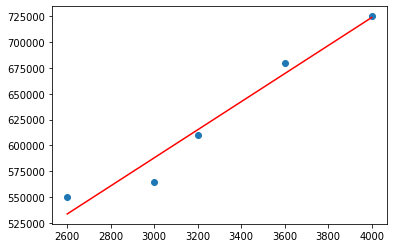

In [16]:
plt.xlabel = "area"
plt.ylabel = "price"
plt.scatter(data.area,data.price)
plt.plot(data.area,reg.predict(data[['area']]),color = 'red')

## Create Linear Regression Model with sklearn 

In [7]:
reg = linear_model.LinearRegression()
features = ['area']
X = data[features]
y = data.price
# FIT data

reg.fit(X,y)


LinearRegression()

## Get Coefficients


In [8]:
reg.coef_


array([135.78767123])

In [9]:
reg.intercept_

180616.43835616432

## personal class to prove the formula

In [10]:
class LinearRegressionModel:
    
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.xbar = sum(x)/len(x)
        self.ybar = sum(y)/len(y)
    def getCoefficient (self):
        n = len(self.x)
        xy = sum(self.x*self.y)
        x_square = sum(self.x*self.x)
        return (n*xy-sum(self.y)*sum(self.x))/(n*x_square-sum(self.x)*sum(self.x))
    def getIntercept (self):
        n = len(self.x)
        return (sum(self.y)/n)-(self.getCoefficient()*sum(self.x)/n)
    def predict (self,arr):
        ans= []
        for x in arr :
            ans.append(self.getCoefficient()*x+self.getIntercept())
        return ans 
    # total deviation from from the mean for actual values  
    def getSST (self):
        st = [(yi-self.ybar)**2 for yi in self.y]
        return sum (st)
    # total deviation from the mean for predicted value
    def getSSR (self):
        sr = [(y_hat-self.ybar)**2 for y_hat in self.predict(self.x)]
        return sum(sr)
    # total of residuals
    def getSSE (self):
        se = [(yi-y_hat)**2 for yi in self.y and y_hat in self.predict(self.x)]
        return sum (se)
    def getRSquared (self) :
        return self.getSSR()/self.getSST()

In [11]:
my_model = LinearRegressionModel(data.area,data.price)

In [12]:
my_model.getCoefficient()

135.7876712328767

In [13]:
my_model.getIntercept()

180616.43835616438

## Verify model using R square method

In [14]:
my_model.getRSquared() 

0.9584301138199495

In [15]:
r2_score(data.price,reg.predict(data[['area']]))

0.9584301138199486

## Using statsmodels library for showing more statistics characteristics

In [28]:
Y = data.price
X = data.area
X = sm.add_constant(X)

model = sm.OLS(Y,X)

/home/shimaa/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
results = model.fit()
results.summary()

/home/shimaa/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     69.17
Date:                Thu, 19 Aug 2021   Prob (F-statistic):            0.00364
Time:                        01:16:50   Log-Likelihood:                -54.709
No. Observations:                   5   AIC:                             113.4
Df Residuals:                       3   BIC:                             112.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.806e+05   5.41e+04      3.337      0.044    8346.956    3.53e+05
area         135.7877     16.327      8.317      0.004      83.828     187.748
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.352
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.408
Skew:                          -0.528   Prob(JB):                        0.816
Kurtosis:                       2.081   Cond. No.                     2.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""